# Quantum Harmonic Oscillator with potential $V(x)  = V_{0}\frac{x^{2}}{a^{2}}$
Quantum harmonic oscillator was a clasical example in quantum mechanics as it could be solved analytically by using raising and lowering operators. The Schro ̈dinger’s equation of harmonic oscillator was as follows:

\begin{align}
 - \frac{\hbar^{2}}{2m} \frac{d^{2} \psi}{dx^{2}} + \frac{1}{2}m \omega^{2}x^{2} \psi = E \psi
\end{align}

where $ \hbar$􏰧, m, $omega$,E, and $psi$ are the Planck’s constant, mass of electron,osillation
frequency, energy,and solution of time-independent Schrödinger’s equation. In this code, we need to compute the similar Schro ̈dinger’s equation but the potential is $V(x) = V_{0}\frac{x^{2}}{a^{2}} $ . Therefore,theSchro ̈dinger’sequationwasnowreadasfollow: 

\begin{align}
 - \frac{\hbar^{2}}{2m} \frac{d^{2} \psi}{dx^{2}} + V_{0}\frac{x^{2}}{a^{2}} \psi = E \psi
\end{align}

When we tried to use Python to compute ψ, we needed to convert the eqaution above into dimension-less form, which as shown below by letting $ \xi = x/b$:

\begin{align}
 \frac{d^{2} \psi(\xi) }{dx^{2}} - \frac{2mb^{4} V_{0}}{\hbar^{2}a^{2}} \psi(\xi) = \frac{-2mEb^{2}}{\hbar^{2}} \psi(\xi)
\end{align}

By imposing 􏰧$\frac{2mb^{4} V_{0}}{\hbar^{2}a^{2}}$ = 1, we could get $b = (\frac{\hbar^{2}a^{2}}{2mV_{0}})^{1/4}$ . Therefore, the equaltion is now dimension-less.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Parameters 
e = 1.60217662E-19
V_0 = 50*e
a = 1E-11
m = 9.1094E-31
h_bar = 1.0546E-34
# b = np.sqrt(a**2*h_bar**2/(2*m*V_0))
b_2 = (a**2*h_bar**2/(2*m*V_0))**(1/4)
N = 1000

w_2 = np.sqrt(2*V_0/(m*a**2))

In [3]:
# Define the fucton fphi and fpsi for 4th order Runge Kutta Method 
def f(r,x,E):
    psi,phi = r
    fpsi = phi
    fphi = (x**2- 2*m*E*b_2**2/h_bar**2)*psi
    return np.array([fpsi,fphi],float)


In [4]:
# RK4 method 
def solve(f,b,**arg):
    psi = 0.0
    phi = 1.0
    L = 20 * a / b
    h = L / N
    r =np.array([psi,phi],float)
    for x in np.arange(-10*a/b,10*a/b,h):
        k1 = h * f(r, x, **arg)
        k2 = h * f(r + 0.5 * k1, x+ 0.5 * h, **arg)
        k3 = h * f(r + 0.5 * k2, x + 0.5 * h, **arg)
        k4 = h * f(r + k3, x + h, **arg)
        r +=  (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return r[0]

In [5]:
# Binary search of ground/excited states energies
# Search which values match the boundary value problem
E_1= [ ]
for i in range(1,15):
    E1 = (100+ i)*e
    E2 =  (100*(i+1))*e
    # E1 = (50)*i*e
    # E2 = 50*(i+1)*e
    psi2 = solve(f=f,b = b_2,E=E1)
    target = float(e*1E-4)
    while abs(E1 - E2) > target:
        psi1, psi2 = psi2, solve(f=f,b = b_2,E=E2)
        E1, E2 = E2, E2 - psi2 * (E2 - E1) / (psi2 - psi1)
    E_1.append(E2/e)
    if i >= 2:
        diff = abs(E_1[-1]- E_1[-2])/e

In [7]:
# Allowed energies 
E_1

[138.0249791279539,
 414.07493773322227,
 414.0749377181093,
 690.1248974303898,
 690.1248974303777,
 690.1248974305457,
 966.1748589542309,
 966.1748589540865,
 966.1748589540529,
 1242.224823267479,
 1242.2248232661964,
 1242.224823267479,
 1518.2747938741013,
 1499.9999089727733]

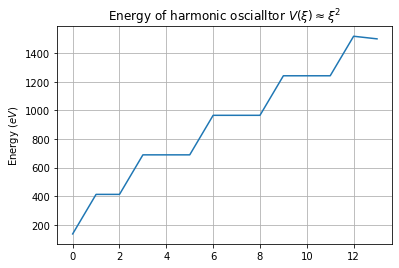

In [6]:
# Plot of Energy spectrum
plt.figure(1)
plt.title(r"Energy of harmonic oscialltor $V(\xi) \approx \xi^{2}$")
plt.ylabel(r"Energy $(eV)$ ")
plt.plot(np.arange(0,len(E_1),1),E_1)
plt.grid(1)